In [1]:
import xarray as xr
import xgcm as xm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
indir = "/data/oceanparcels/input_data/MITgcm/ACC_channel/"
ds_coarse = xr.open_dataset(indir + "ACC_ridge_coarse_1y_locb_fixtemp_with_derivative.nc")
ds_coarsened = xr.open_dataset(indir + "ACC_ridge_fine_1y_locb_coarsened_tave_fixtemp_with_derivative.nc")

In [3]:
grid = xm.Grid(ds_coarse, periodic=['X'])

In [4]:
ds_coarse

<xarray.Dataset>
Dimensions:               (XC: 20, XG: 20, YC: 40, YG: 40, Z: 49, Zl: 49, Zp1: 50, Zu: 49, time: 360)
Coordinates: (12/34)
    iter                  (time) int64 ...
  * time                  (time) object 2000-01-02 11:53:20 ... 2001-01-01 12...
  * XC                    (XC) float32 2.5e+04 7.5e+04 ... 9.25e+05 9.75e+05
  * YC                    (YC) float32 2.5e+04 7.5e+04 ... 1.925e+06 1.975e+06
  * XG                    (XG) float32 0.0 5e+04 1e+05 ... 8.5e+05 9e+05 9.5e+05
  * YG                    (YG) float32 0.0 5e+04 1e+05 ... 1.9e+06 1.95e+06
    ...                    ...
    maskS                 (Z, YG, XC) bool ...
    dxF                   (YC, XC) float32 ...
    dyU                   (YG, XG) float32 ...
    rhoRef                (Z) float32 ...
    dyF                   (YC, XC) float32 ...
    dxV                   (YG, XG) float32 ...
Data variables: (12/43)
    TRELAX                (time, YC, XC) float32 ...
    MXLDEPTH              (time, YC, XC) float32 ...
    ETAN                  (time, YC, XC) float32 ...
    THETA                 (time, Z, YC, XC) float32 ...
    SALT                  (time, Z, YC, XC) float32 ...
    VVEL                  (time, Z, YG, XC) float32 ...
    ...                    ...
    drdX                  (time, Z, YG, XC) float32 ...
    drdY                  (time, Z, YC, XG) float32 ...
    drdZ                  (time, Zl, YG, XG) float32 ...
    ddeltadX              (time, Z, YC, XG) float32 ...
    ddeltadY              (time, Z, YG, XC) float32 ...
    ddeltadZ              (time, Zl, YC, XC) float32 ...
Attributes:
    Conventions:  CF-1.6
    title:        netCDF wrapper of MITgcm MDS binary data
    source:       MITgcm
    history:      Created by calling `open_mdsdataset(grid_dir='/data/oceanpa...

In [5]:
Sx_coarse = -grid.interp(ds_coarse.dTHETAdX, 'X', to='center')/grid.interp(ds_coarse.dTHETAdZ, 'Z', to='center', boundary='extend')
Sy_coarse = -grid.interp(ds_coarse.dTHETAdY, 'Y', to='center', boundary='extend')/grid.interp(ds_coarse.dTHETAdZ, 'Z', to='center', boundary='extend')
Sabs_coarse = np.sqrt(Sy_coarse**2 + Sy_coarse**2)

In [6]:
Sx_coarsened = -grid.interp(ds_coarsened.dTHETAdX, 'X', to='center')/grid.interp(ds_coarsened.dTHETAdZ, 'Z', to='center', boundary='extend')
Sy_coarsened = -grid.interp(ds_coarsened.dTHETAdY, 'Y', to='center', boundary='extend')/grid.interp(ds_coarsened.dTHETAdZ, 'Z', to='center', boundary='extend')
Sabs_coarsened = np.sqrt(Sy_coarsened**2 + Sy_coarsened**2)

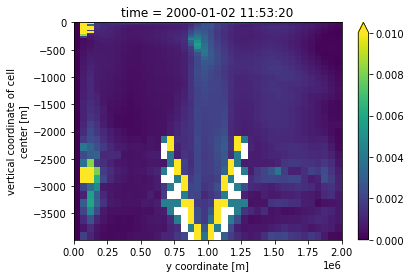

In [8]:
Sabs_coarse.isel(time=0).max(dim='XC').plot(vmax=0.01)

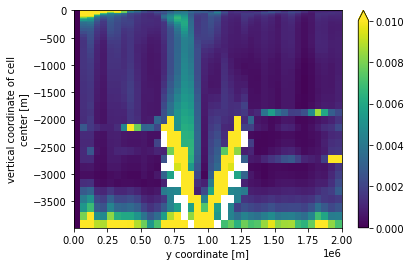

In [9]:
Sabs_coarsened.max(dim='XC').plot(vmax=0.01)

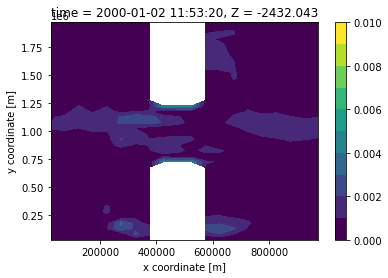

In [9]:
Sabs_coarse.isel(time=0, Z=38).plot.contourf(vmax=0.01, levels=11)

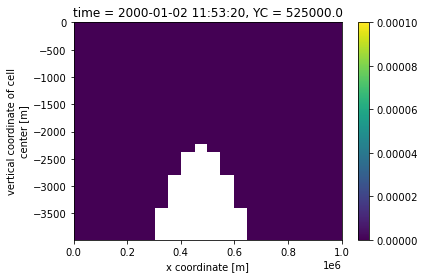

In [41]:
(Sx.isel(time=0, YC=10) - Sx.isel(time=0, YC=10)).plot(vmax=0.0001)

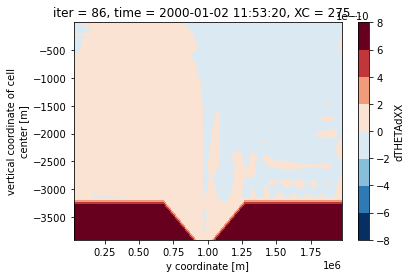

In [48]:
ds_coarse.dTHETAdXX.isel(time=0, XC=5).plot.contourf(levels=10, robust=True)

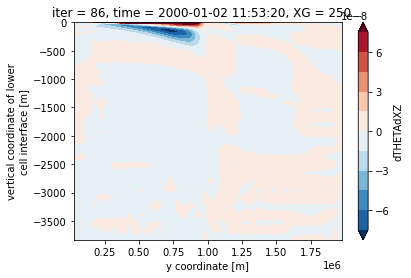

In [10]:
ds_coarse.dTHETAdXZ.isel(time=0, XG=5).plot.contourf(levels=10, robust=True)

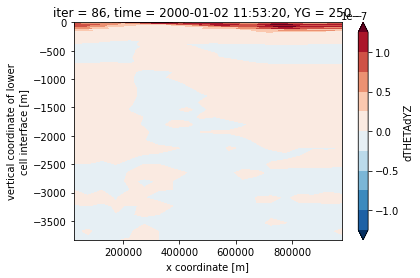

In [11]:
ds_coarse.dTHETAdYZ.isel(time=0, YG=5).plot.contourf(levels=10, robust=True)

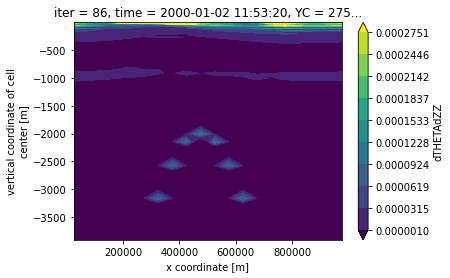

In [12]:
ds_coarse.dTHETAdZZ.isel(time=0, YC=5).plot.contourf(levels=10, robust=True, vmin=1e-6)

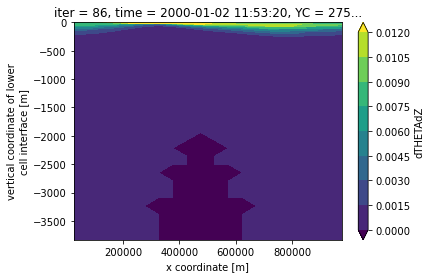

In [13]:
ds_coarse.dTHETAdZ.isel(time=0, YC=5).plot.contourf(levels=10, robust=True)

In [28]:
np.sum(ds_coarse.dTHETAdZ.isel(time=0, Zl=1) == 0)

<xarray.DataArray 'dTHETAdZ' ()>
array(0)
Coordinates:
    iter     int64 86
    time     object 2000-01-02 11:53:20
    Zl       float32 -5.487

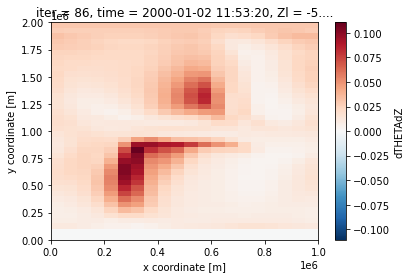

In [30]:
ds_coarse.dTHETAdZ.isel(time=0, Zl=1).plot()

In [49]:
np.sum(ds_coarsened.dTHETAdZ.isel(Zl=10) == 0)

<xarray.DataArray 'dTHETAdZ' ()>
array(0)
Coordinates:
    Zl       float32 -100.4

In [42]:
ds_coarse.hFacC

<xarray.DataArray 'hFacC' (Z: 49, YC: 40, XC: 20)>
array([[[0.      , 0.      , ..., 0.      , 0.      ],
        [1.      , 1.      , ..., 1.      , 1.      ],
        ...,
        [1.      , 1.      , ..., 1.      , 1.      ],
        [1.      , 1.      , ..., 1.      , 1.      ]],

       [[0.      , 0.      , ..., 0.      , 0.      ],
        [1.      , 1.      , ..., 1.      , 1.      ],
        ...,
        [1.      , 1.      , ..., 1.      , 1.      ],
        [1.      , 1.      , ..., 1.      , 1.      ]],

       ...,

       [[0.      , 0.      , ..., 0.      , 0.      ],
        [1.      , 1.      , ..., 1.      , 1.      ],
        ...,
        [1.      , 1.      , ..., 1.      , 1.      ],
        [1.      , 1.      , ..., 1.      , 1.      ]],

       [[0.      , 0.      , ..., 0.      , 0.      ],
        [0.999999, 0.999999, ..., 0.999999, 0.999999],
        ...,
        [0.999999, 0.999999, ..., 0.999999, 0.999999],
        [0.999999, 0.999999, ..., 0.999999, 0.999999]]], dtype=float32)
Coordinates:
  * XC       (XC) float32 2.5e+04 7.5e+04 1.25e+05 ... 9.25e+05 9.75e+05
  * YC       (YC) float32 2.5e+04 7.5e+04 1.25e+05 ... 1.925e+06 1.975e+06
  * Z        (Z) float32 -2.744 -8.584 -15.18 ... -3.758e+03 -3.908e+03
    rA       (YC, XC) float32 2.5e+09 2.5e+09 2.5e+09 ... 2.5e+09 2.5e+09
    Depth    (YC, XC) float32 0.0 0.0 0.0 0.0 ... 3.982e+03 3.982e+03 3.982e+03
    drF      (Z) float32 5.487 6.195 6.993 7.894 ... 148.7 149.0 149.2 149.4
    PHrefC   (Z) float32 26.91 84.21 148.9 ... 3.541e+04 3.687e+04 3.833e+04
    hFacC    (Z, YC, XC) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0 1.0
    maskC    (Z, YC, XC) bool False False False False ... True True True True
    dxF      (YC, XC) float32 5e+04 5e+04 5e+04 5e+04 ... 5e+04 5e+04 5e+04
    rhoRef   (Z) float32 1.035e+03 1.035e+03 1.035e+03 ... 1.035e+03 1.035e+03
    dyF      (YC, XC) float32 5e+04 5e+04 5e+04 5e+04 ... 5e+04 5e+04 5e+04
Attributes:
    standard_name:  cell_vertical_fraction
    long_name:      vertical fraction of open cell

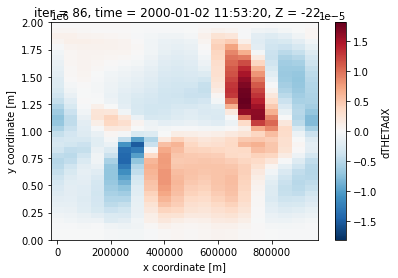

In [17]:
ds_coarse.dTHETAdX.isel(time=0, Z=3).plot()